In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# 첫 3줄은 제외하고 탭을 구분자로 읽어오기
# low_memory = False 설정으로 파일 전체를 읽어 데이터타입을 정확히 추론시킴
df = pd.read_csv('markers.trc', sep='\t', skiprows=3, low_memory=False)
df

,Frame#,Time,RACR,Unnamed: 3,Unnamed: 4,RELB,Unnamed: 6,Unnamed: 7,RUSP,Unnamed: 9,...,Unnamed: 118,RFOREARM,Unnamed: 120,Unnamed: 121,RIC,Unnamed: 123,Unnamed: 124,LIC,Unnamed: 126,Unnamed: 127
0,NaN,NaN,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,...,Z39,X40,Y40,Z40,X41,Y41,Z41,X42,Y42,Z42
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.00,0.3005320434570313,1.402412963867188,-0.443366943,0.2260919189453125,1.096468872070313,-0.323174103,0.410969482,1.028851928710937,...,-0.860974854,0.3411316223144532,1.060723145,-0.364091003,0.2619522094726562,0.9822859497070313,-0.467706604,0.2575960083007813,0.9957064208984375,-0.750066528
3,2.0,0.01,0.3005074157714844,1.402401367,-0.443363342,0.2260716400146484,1.096424560546875,-0.323076447,0.4110455017089844,1.028998535,...,-0.860994141,0.341246094,1.060853393554688,-0.364039063,0.2615967407226563,0.981991943,-0.467897583,0.2574085998535156,0.9956400756835938,-0.750005249
4,3.0,0.02,0.3005135803222656,1.402353393554687,-0.443316956,0.2261363983154297,1.096443603515625,-0.323023651,0.411071533,1.029090087890625,...,-0.861044495,0.3413614196777344,1.060982299804688,-0.363999207,0.2614523620605469,0.9819704589843751,-0.467859802,0.2571579284667969,0.9956693725585938,-0.750025146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,9237.0,92.36,0.2840531005859375,1.397603027,-0.432818512,0.2467771148681641,1.084277099609375,-0.307931,0.4113963928222656,1.063237182617188,...,-0.822120056,0.3304601745605469,1.053296508789062,-0.385895844,0.2660024108886719,0.988212158,-0.456852295,0.2555068206787109,0.9978246459960938,-0.742961182
9239,9238.0,92.37,0.2839000549316406,1.397578979492188,-0.432824066,0.2466562194824219,1.084282348632813,-0.307998505,0.4112790832519531,1.063219238,...,-0.822158325,0.3302477111816406,1.053207153320312,-0.385983307,0.2659645385742188,0.9883065795898438,-0.456806885,0.2554685516357422,0.9977761840820313,-0.743019348
9240,9239.0,92.38,0.2824874572753907,1.397677001953125,-0.4331987,0.2464417266845703,1.084284423828125,-0.308075439,0.4110608520507812,1.063121459960938,...,-0.82219928,0.3299853820800781,1.053125,-0.386078613,0.2659265747070312,0.9882930908203125,-0.456837738,0.2554271545410156,0.9977261352539063,-0.743079956
9241,9240.0,92.39,0.2823254699707031,1.397665405273438,-0.433237579,0.2461019134521484,1.084031616210938,-0.308289124,0.4107971496582031,1.063113525390625,...,-0.822080566,0.329721436,1.053055297851563,-0.386167877,0.2658247375488281,0.9882398681640625,-0.456814941,0.2557183837890625,0.9974751586914062,-0.74280481


In [3]:
# NaN으로만 가득 찬 행 있는지 확인하고 제거하기
# x, y, z 데이터만 표에 남기고 제거하기
# 각 점 이름으로 데이터 헤더 만들기

print(df.iloc[1].isnull().all()) # 1번 행은 전부 NaN값인지 확인
df.drop(index=1, inplace=True) # 확인하고 제거

df.drop(columns=df.iloc[:,0:2], inplace=True) # 0,1번 컬럼 Frame# 과 Time 제거
df = df.rename(columns=df.iloc[0])  # 0번 행(xyz)을 열로 설정
df = df.iloc[1:].reset_index(drop=True)  # 0번 행 제거 및 인덱스 초기화

df

True


,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,...,Z39,X40,Y40,Z40,X41,Y41,Z41,X42,Y42,Z42
0,0.3005320434570313,1.402412963867188,-0.443366943,0.2260919189453125,1.096468872070313,-0.323174103,0.410969482,1.028851928710937,-0.453812927,0.4033693542480469,...,-0.860974854,0.3411316223144532,1.060723145,-0.364091003,0.2619522094726562,0.9822859497070313,-0.467706604,0.2575960083007813,0.9957064208984375,-0.750066528
1,0.3005074157714844,1.402401367,-0.443363342,0.2260716400146484,1.096424560546875,-0.323076447,0.4110455017089844,1.028998535,-0.453819275,0.4034386596679688,...,-0.860994141,0.341246094,1.060853393554688,-0.364039063,0.2615967407226563,0.981991943,-0.467897583,0.2574085998535156,0.9956400756835938,-0.750005249
2,0.3005135803222656,1.402353393554687,-0.443316956,0.2261363983154297,1.096443603515625,-0.323023651,0.411071533,1.029090087890625,-0.453828552,0.4034967346191407,...,-0.861044495,0.3413614196777344,1.060982299804688,-0.363999207,0.2614523620605469,0.9819704589843751,-0.467859802,0.2571579284667969,0.9956693725585938,-0.750025146
3,0.300491943,1.402373779296875,-0.443295868,0.2262381744384766,1.096412963867188,-0.322964172,0.4110860900878907,1.029195068359375,-0.453893188,0.4036086120605469,...,-0.861035339,0.3414822998046875,1.061118041992188,-0.363973022,0.2612640380859375,0.9820211791992187,-0.467826874,0.2569388427734375,0.9956968994140625,-0.750030029
4,0.3004636535644531,1.402349243164063,-0.443289398,0.22631543,1.096437012,-0.322890869,0.4109480285644531,1.029253051757812,-0.454063629,0.4036075134277344,...,-0.861115173,0.3416029357910156,1.061262207,-0.363956482,0.2610299072265625,0.9818090820312501,-0.467903687,0.2566847229003906,0.9957445678710938,-0.750046631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9236,0.2840531005859375,1.397603027,-0.432818512,0.2467771148681641,1.084277099609375,-0.307931,0.4113963928222656,1.063237182617188,-0.474103149,0.3828434143066407,...,-0.822120056,0.3304601745605469,1.053296508789062,-0.385895844,0.2660024108886719,0.988212158,-0.456852295,0.2555068206787109,0.9978246459960938,-0.742961182
9237,0.2839000549316406,1.397578979492188,-0.432824066,0.2466562194824219,1.084282348632813,-0.307998505,0.4112790832519531,1.063219238,-0.47411969,0.3826783447265625,...,-0.822158325,0.3302477111816406,1.053207153320312,-0.385983307,0.2659645385742188,0.9883065795898438,-0.456806885,0.2554685516357422,0.9977761840820313,-0.743019348
9238,0.2824874572753907,1.397677001953125,-0.4331987,0.2464417266845703,1.084284423828125,-0.308075439,0.4110608520507812,1.063121459960938,-0.474169525,0.3825666809082031,...,-0.82219928,0.3299853820800781,1.053125,-0.386078613,0.2659265747070312,0.9882930908203125,-0.456837738,0.2554271545410156,0.9977261352539063,-0.743079956
9239,0.2823254699707031,1.397665405273438,-0.433237579,0.2461019134521484,1.084031616210938,-0.308289124,0.4107971496582031,1.063113525390625,-0.474210693,0.382367676,...,-0.822080566,0.329721436,1.053055297851563,-0.386167877,0.2658247375488281,0.9882398681640625,-0.456814941,0.2557183837890625,0.9974751586914062,-0.74280481


In [4]:
# markers_ik.mot 파일 열기
df_mot = pd.read_csv('markers_ik.mot', sep='\t', skiprows=10) # 첫 10줄 제외하고 읽기기
df_mot = df_mot[['hip_flexion_l', 'hip_flexion_r','knee_angle_l', 'knee_angle_r']] # 필요한 열만 남겨주기기

df_mot

,hip_flexion_l,hip_flexion_r,knee_angle_l,knee_angle_r
0,19.374979,17.012816,21.417873,18.675918
1,19.739292,17.368058,21.658684,18.871144
2,20.033728,17.659634,21.823572,19.023627
3,19.486701,17.155843,21.497053,18.839914
4,19.717840,17.391318,21.652431,18.964610
...,...,...,...,...
9236,3.744745,3.313912,10.725418,13.979616
9237,4.306112,3.966051,10.732485,14.152690
9238,3.418309,3.033360,10.438864,13.725681
9239,3.340919,3.034477,10.291660,13.763252


In [5]:
# 전체 데이터프레임의 최댓값, 최솟값 확인
print(df.max().max())
print(df.min().min())

7.965248823165893e-05
-0.000120898


saved.


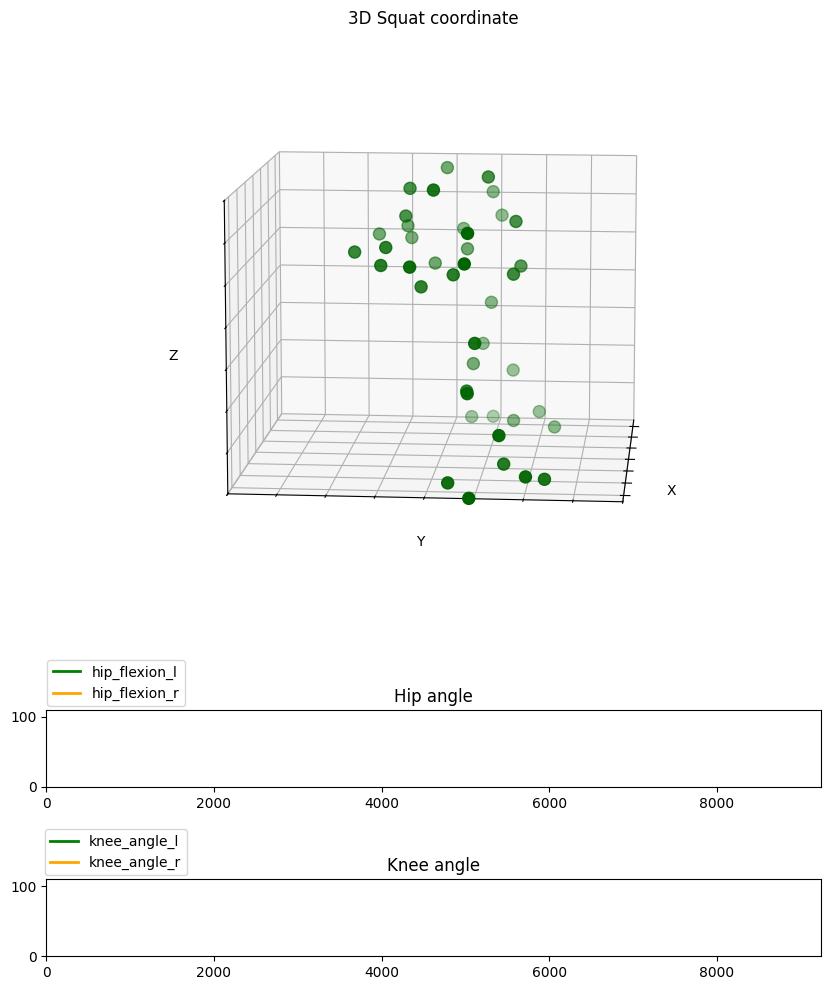

In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
import pandas as pd

# x, y, z 열 필터링
# 각 열 이름이 x, y, z로 시작하는 열들을 분리
x_columns = [col for col in df.columns if col.startswith('Z')]
y_columns = [col for col in df.columns if col.startswith('X')]
z_columns = [col for col in df.columns if col.startswith('Y')]

# 필요한 모든 열의 데이터 타입 변환
columns_to_convert = x_columns + y_columns + z_columns # 모든 열 합쳐서 한 줄로 변환하기
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce') # 에러 시 NaN으로 변환

# z 전체 범위 계산
z_min_global = df[z_columns].min().min() # z값 중 최소
z_max_global = df[z_columns].max().max() # z값 중 최대대

# 그래프 레이아웃 (gridspec 사용)
fig = plt.figure(figsize=(10, 12))
gs = gridspec.GridSpec(6, 1, figure=fig, hspace=1.2)  # hspace로 서브플롯 간격 1.2로 설정


# 서브플롯 1: 3D 그래프 
# trc파일 데이터로 그림림
ax_3d = fig.add_subplot(gs[:4, 0], projection='3d')
ax_3d.set_xlim(df[x_columns].min().min(), df[x_columns].max().max())
ax_3d.set_ylim(-0.7, 0.1)
ax_3d.set_zlim(0, z_max_global - z_min_global)
ax_3d.view_init(elev=10, azim=5)

# 초기 상태의 산점도
sc = ax_3d.scatter([], [], [], c='darkgreen', s=75)
ax_3d.set_title("3D Squat coordinate")
ax_3d.set_xlabel("X")
ax_3d.set_ylabel("Y")
ax_3d.set_zlabel("Z")

# 3D 그래프 틱 숫자 숨기고 격자선 유지
ax_3d.set_xticklabels([])  # X축 틱 숫자 숨김
ax_3d.set_yticklabels([])  # Y축 틱 숫자 숨김
ax_3d.set_zticklabels([])  # Z축 틱 숫자 숨김


# 서브플롯 2: 2D hip angle l, r그래프
# mot파일 데이터로 그림림
ax_2d_1 = fig.add_subplot(gs[4, 0])  # 그래프 시작위치
ax_2d_1.set_xlim(0, len(df_mot))  # 시계열 전체 길이
ax_2d_1.set_ylim(0, 110)

# 그래프 초기 모습
hip_flexion_l_line, = ax_2d_1.plot([], [], color='green', linewidth=2, label='hip_flexion_l')
hip_flexion_r_line, = ax_2d_1.plot([], [], color='orange', linewidth=2, label='hip_flexion_r')

# 범례 위치 직접 설정
ax_2d_1.legend(bbox_to_anchor=(0.09, 1.35), loc='center')
ax_2d_1.set_title("Hip angle")

# 서브플롯 3: knee angle l, r 그래프
# mot 파일 데이터로 그림림
ax_2d_2 = fig.add_subplot(gs[5, 0])  # 하단 행
ax_2d_2.set_xlim(0, len(df))  # 시계열 전체 길이
ax_2d_2.set_ylim(0, 110)

# 그래프 초기모습
knee_angle_l_line, = ax_2d_2.plot([], [], color='green', linewidth=2, label='knee_angle_l')
knee_angle_r_line, = ax_2d_2.plot([], [], color='orange', linewidth=2, label='knee_angle_r')

# 범례 위치 직접 설정
ax_2d_2.legend(bbox_to_anchor=(0.09, 1.35), loc='center')
ax_2d_2.set_title("Knee angle")

# 애니메이션 업데이트 함수
def update(frame):
    # 3D 플롯 업데이트
    x_coords = df.iloc[frame][x_columns].values
    y_coords = df.iloc[frame][y_columns].values
    z_coords = df.iloc[frame][z_columns].values
    y_coords_reversed = -y_coords
    z_coords_shifted = z_coords - z_min_global
    sc._offsets3d = (x_coords, y_coords_reversed, z_coords_shifted)

    # 첫 번째 선 그래프 업데이트 (hip_flexion_l, hip_flexion_r)
    hip_flexion_l_line.set_data(range(frame), df_mot["hip_flexion_l"][:frame])
    hip_flexion_r_line.set_data(range(frame), df_mot["hip_flexion_r"][:frame])

    # 두 번째 선 그래프 업데이트 (knee_angle_l, knee_angle_r)
    knee_angle_l_line.set_data(range(frame), df_mot["knee_angle_l"][:frame])
    knee_angle_r_line.set_data(range(frame), df_mot["knee_angle_r"][:frame])

    return sc, hip_flexion_l_line, hip_flexion_r_line, knee_angle_l_line, knee_angle_r_line

# 애니메이션 생성
ani = FuncAnimation(fig, update, frames=range(0, len(df), 50), blit=False)

# mp4 파일로 저장 (ffmpeg 사용)
ani.save('Skeleton_plot.mp4', fps=24, extra_args=['-vcodec', 'libx264'])
print("saved.")